In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os as os
import seaborn as sns
import mysql.connector as sql
from wordcloud import WordCloud, STOPWORDS




# -------------------------------------------------------------

## Connect to the mysql session and select the necessary queries to export to excel

In [2]:
os.chdir('/Users/andresabala/Downloads/Data Analysis Projects/Wine Project')

In [3]:
db_connection = sql.connect(host='localhost', database='Wine', user='root', password='')
db_cursor= db_connection.cursor()


In [4]:
db_cursor.execute('SELECT * FROM wine_ranks_per_varietal')
table_rows = db_cursor.fetchall()
winery_df = pd.DataFrame(table_rows)
winery_df.dtypes                        
winery_df[7]=pd.to_numeric(winery_df[7])
winery_df.dtypes
winery_df

#When trying to aggregate Price/Bottle (column=6), inf was returned because the datatype was an object. 
    #Converted datatype to float64, and was able to aggregate 



,0,1,2,3,4,5,6,7,8
0,US,California,Napa Valley,Cardinale\r,Cardinale 2006 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,100,200,1
1,US,California,Oak Knoll District,Trefethen\r,Trefethen 2005 Reserve Cabernet Sauvignon (Oak...,Cabernet Sauvignon,99,100,2
2,US,Washington,Columbia Valley (WA),Quilceda Creek\r,Quilceda Creek 2008 Cabernet Sauvignon (Columb...,Cabernet Sauvignon,99,125,3
3,US,California,Oakville,Venge\r,Venge 2008 Family Reserve Cabernet Sauvignon (...,Cabernet Sauvignon,99,125,3
4,US,California,Napa Valley,David Arthur\r,David Arthur 2009 Elevation 1147 Estate Cabern...,Cabernet Sauvignon,99,150,5
...,...,...,...,...,...,...,...,...,...
51570,US,California,Lodi,Moss Roxx\r,Moss Roxx 2011 Ancient Vine Zinfandel (Lodi),Zinfandel,80,25,2704
51571,US,California,Sonoma Valley,Tin Barn\r,Tin Barn 2010 Los Chamizal Vineyard Zinfandel ...,Zinfandel,80,28,2705
51572,US,California,California,Wise Villa\r,Wise Villa 2011 Zinfandel (California),Zinfandel,80,29,2706
51573,US,California,Paso Robles,Opolo\r,Opolo 2011 Reserve Zinfandel (Paso Robles),Zinfandel,80,44,2707


## Determine the overall correlation between Score and Price for all rows in winery_df

In [5]:
correlation_overall=(winery_df
 .rename(columns={0:'Country', 1:'Province', 2:'Region',3:'Winery', 4: 'Wine', 5:'Varietal', 6:'Score/Bottle',7:'Price/Bottle', 8:'Rank'})
 .loc[:,['Score/Bottle', 'Price/Bottle']] 
 .corr()
                    )

correlation_overall

,Score/Bottle,Price/Bottle
Score/Bottle,1.000000,0.429732
Price/Bottle,0.429732,1.000000


## Insights

-- The overall correlation of Score and Price for all wines reviewed is +0.43, suggesting a Moderate Positive Correlation--> meaning that as price goes up, the score given will also go up 

# Plot Avg Score vs Price per Varietal Wine for Each Country

/Users/andresabala/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


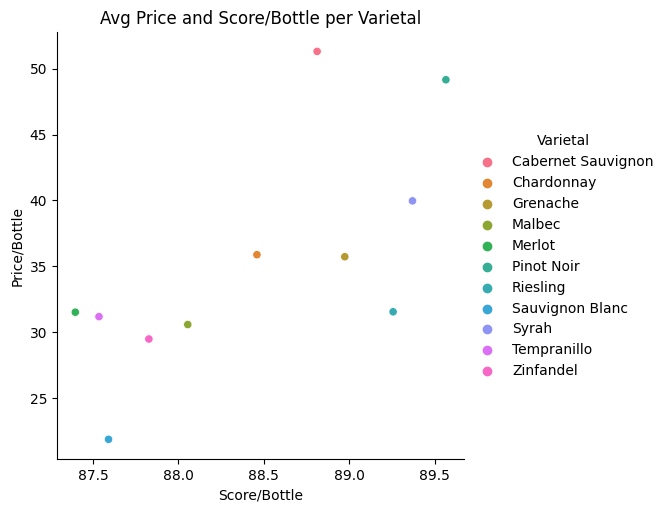

In [6]:
country_score_price_plot=(winery_df
 .rename(columns={0:'Country', 1:'Province', 2:'Region',3:'Winery', 4: 'Wine', 5:'Varietal', 6:'Score/Bottle',7:'Price/Bottle', 8:'Rank'})
 .groupby(['Varietal'])
 .agg({'Score/Bottle':'mean','Price/Bottle':'mean'})        
                         )

country_score_price_plot
sns.relplot(data=country_score_price_plot, x='Score/Bottle', y='Price/Bottle', hue='Varietal').set(title='Avg Price and Score/Bottle per Varietal')


## Insights:

--Riesling scored higher on average than varietals that were priced similarly (i.e. Merlot, Tempranillo, Zinfandel, Malbec). Additionally, Riesling was in the top 3 of highest scoring varietals, despite being in the lower 55% with respect to price/bottle

--Pinot Noir was overall the highest-rated varietal while Cabernet Sauvignon was the highest-priced bottle

--Merlot was the lowest-rated varietal and Sauvignon Blanc was the lowest-priced bottle

# Determine Correlation for each Varietal 

In [7]:
varietal_correlation=(winery_df
 .rename(columns={0:'Country', 1:'Province', 2:'Region',3:'Winery', 4: 'Wine', 5:'Varietal', 6:'Score/Bottle',7:'Price/Bottle', 8:'Rank'})
 .groupby(['Varietal'])[['Price/Bottle', 'Score/Bottle']]
 .corr()
        )

varietal_correlation




Price/Bottle  Score/Bottle
Varietal                                                   
Cabernet Sauvignon Price/Bottle      1.000000      0.547180
                   Score/Bottle      0.547180      1.000000
Chardonnay         Price/Bottle      1.000000      0.422356
                   Score/Bottle      0.422356      1.000000
Grenache           Price/Bottle      1.000000      0.410288
                   Score/Bottle      0.410288      1.000000
Malbec             Price/Bottle      1.000000      0.522814
                   Score/Bottle      0.522814      1.000000
Merlot             Price/Bottle      1.000000      0.435585
                   Score/Bottle      0.435585      1.000000
Pinot Noir         Price/Bottle      1.000000      0.362057
                   Score/Bottle      0.362057      1.000000
Riesling           Price/Bottle      1.000000      0.399336
                   Score/Bottle      0.399336      1.000000
Sauvignon Blanc    Price/Bottle      1.000000      0.522463
                   Score/Bottle      0.522463      1.000000
Syrah              Price/Bottle      1.000000      0.380525
                   Score/Bottle      0.380525      1.000000
Tempranillo        Price/Bottle      1.000000      0.529807
                   Score/Bottle      0.529807      1.000000
Zinfandel          Price/Bottle      1.000000      0.377620
                   Score/Bottle      0.377620      1.000000

## Insights

-- Cabernet Sauvignon had the strongest correlation between score and price, followed by Tempranillo and then 
      Malbec
      
-- The lowest correlation between score and price is seen in Pinot Noir, followed by Zinfandel and then Syrah

# Correlation for each Varietal by Country

/Users/andresabala/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Price/Bottle Score/Bottle
Varietal           Country                                         
Cabernet Sauvignon Argentina Price/Bottle          NaN      0.44169
                             Score/Bottle      0.44169          NaN
                   Australia Price/Bottle          NaN     0.480761
                             Score/Bottle     0.480761          NaN
                   France    Price/Bottle          NaN     0.669316
...                                                ...          ...
Tempranillo        US        Score/Bottle     0.406171          NaN
Zinfandel          Australia Price/Bottle          NaN          0.5
                             Score/Bottle          0.5          NaN
                   US        Price/Bottle          NaN     0.377626
                             Score/Bottle     0.377626          NaN

[138 rows x 2 columns]

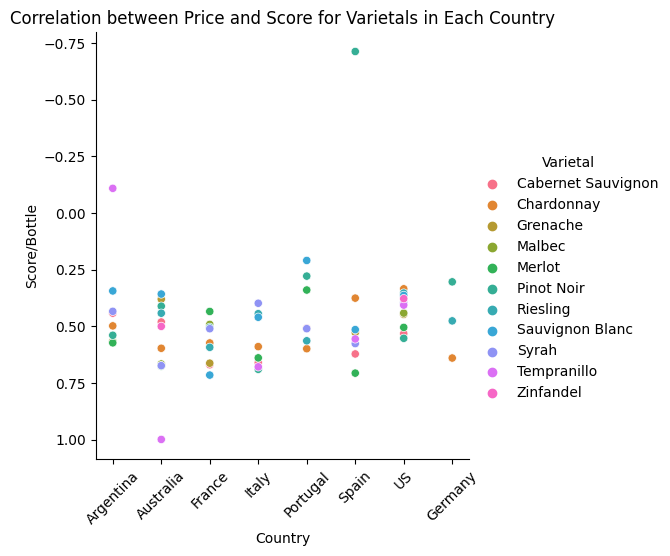

In [8]:
varietal_country_correlation=(winery_df
 .rename(columns={0:'Country', 1:'Province', 2:'Region',3:'Winery', 4: 'Wine', 5:'Varietal', 6:'Score/Bottle',7:'Price/Bottle', 8:'Rank'})
 .groupby(['Varietal', 'Country'])[['Price/Bottle', 'Score/Bottle']]
 .corr()
 .replace(1.0,'NaN')
          )


(sns.relplot(data=varietal_country_correlation, x='Country', y='Score/Bottle', hue='Varietal')
.set(title='Correlation between Price and Score for Varietals in Each Country')
)
plt.xticks(rotation=45)


varietal_country_correlation

## Insights:

-- r-value of Score to Price (of all wines in the dataframe)= +0.43. This indicates a moderate postive relationship. As price goes up, score is may likely go up as well and vice versa.

-- Sauvignon Blanc interestingly had the weakest correlation between score and price for Argentina, Australia, and Portugal

# Import wine_price_segment query from MySQL, convert object dtypes to numeric

In [9]:
db_cursor.execute('SELECT * FROM wine_price_segments')
table_rows = db_cursor.fetchall()
segments_df = pd.DataFrame(table_rows)
segments_df[1]=pd.to_numeric(segments_df[1])
segments_df[2]= pd.to_numeric(segments_df[2])
segments_df=segments_df.rename(columns={0:'Country', 1:'Avg_Score/Bottle', 2:'Avg_Price/Bottle', 3:'Price_Segment'})
segments_df

# to view the wine price segments --> https://media.winefolly.com/wine-pricing-segments.jpg

,Country,Avg_Score/Bottle,Avg_Price/Bottle,Price_Segment
0,Argentina,91.67,220.00,Icon
1,Argentina,91.96,131.89,Super Luxury
2,Argentina,91.34,73.88,Luxury
3,Argentina,89.90,40.94,Ultra Premium
4,Argentina,87.85,25.52,Super Premium
...,...,...,...,...
60,US,87.89,26.19,Super Premium
61,US,86.99,18.40,Premium
62,US,86.07,13.51,Popular Premium
63,US,84.96,9.17,Value


# Visualization of Price Segments

In [10]:
db_cursor.execute('SELECT * FROM price_segment_countries')
table_rows = db_cursor.fetchall()
segments_df = pd.DataFrame(table_rows)
segments_df.dtypes                
segments_df[3]=pd.to_numeric(segments_df[3])
segments_df[4]=pd.to_numeric(segments_df[4])
#change columns 3 and 4 to numeric

In [11]:
segments_df

,0,1,2,3,4
0,Germany,Icon,46,94.57,392.37
1,France,Icon,192,94.57,377.14
2,Italy,Icon,28,93.25,327.93
3,Spain,Icon,9,94.22,322.89
4,US,Icon,70,94.01,301.83
...,...,...,...,...,...
60,US,Value,1025,84.96,9.17
61,Spain,Value,241,84.43,9.15
62,Australia,Value,88,85.01,8.75
63,US,Extreme Value,4,84.25,4.00


/Users/andresabala/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


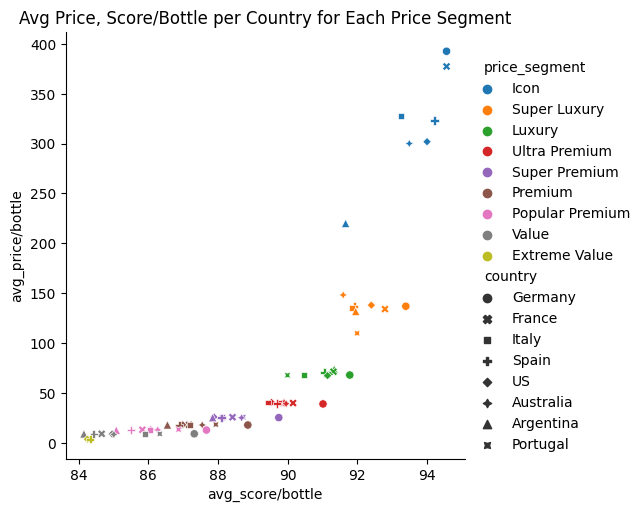

In [12]:
segments_plot=(segments_df
.rename(columns= {0:'country', 1:'price_segment', 2:'#_wines_in_segment', 3:'avg_score/bottle', 4:'avg_price/bottle'})
.loc[:,['country', 'price_segment', 'avg_score/bottle','avg_price/bottle']]
.set_index('country')
    )

sns.relplot(data=segments_plot, x='avg_score/bottle', y='avg_price/bottle', hue='price_segment', style='country').set(title='Avg Price, Score/Bottle per Country for Each Price Segment')




## Insights:
  --Germany consistently had higher scores on avg in each price segment compared to its peers, except for the
         Icon price segment.
         
 -- Portugal was in the top 2 in avg score/bottle in the Popular Premium and Value price segments. However, 
          Portugal tended to have lower avg score/bottle in both Super Luxury and Luxury segments.
          
 -- France, Germany and Spain (all Old World wines) had the highest scores in the Icon segment. 
 
 -- Old World Wines (France, Italy, Germany, Spain, Portugal) tended to occupy the top 3 spots with respect to 
           avg score/bottle in the Ultra Premium, Luxury, Super Luxury, and Icon Price Segments
           
 -- New World Wines (Australia, Argentina, the US) tended to do better in Extreme Value, Value, Popular Premium and Super Premium segments 
      
        

## Make Word Cloud of for each wine in each Country wine segment

In [13]:
db_cursor.execute('SELECT * FROM word_cloud')
table_rows = db_cursor.fetchall()
word_df = pd.DataFrame(table_rows)
word_df=word_df.rename(columns={0:'Country', 1:'Varietal', 2:'Wine', 3:'Winery', 4: 'Description', 5:'Score', 6:'Price',7:'Wine_Segment'})                        
word_df.dtypes
word_df



,Country,Varietal,Wine,Winery,Description,Score,Price,Wine_Segment
0,Argentina,Cabernet Sauvignon,Vi√±a Cobos 2012 Volturno Marchiori Vineyard C...,Vi√±a Cobos\r,"This immense Cabernet contains 3% Malbec, and ...",91,230,Icon
1,Argentina,Cabernet Sauvignon,Vi√±a Cobos 2013 Volturno Cabernet Sauvignon (...,Vi√±a Cobos\r,Gritty berry aromas are solid but a bit underw...,92,230,Icon
2,Argentina,Cabernet Sauvignon,Bodega Catena Zapata 2012 Catena Alta Historic...,Bodega Catena Zapata\r,"Foresty, earthy aromas of leather and black fr...",92,55,Luxury
3,Argentina,Cabernet Sauvignon,Vi√±a Cobos 2012 Bramare Marchiori Vineyard Ca...,Vi√±a Cobos\r,"Concentrated and woody smelling, this ripe Cab...",92,90,Luxury
4,Argentina,Cabernet Sauvignon,Vi√±a Cobos 2011 Bramare Marchiori Vineyard Ca...,Vi√±a Cobos\r,Chunky black-fruit aromas are ripe but familia...,92,76,Luxury
...,...,...,...,...,...,...,...,...
51570,US,Zinfandel,Coyote Creek 2012 White Zinfandel (California),Coyote Creek\r,"With lots of residual sugar, this white Zin is...",83,7,Value
51571,US,Zinfandel,Glen Ellen 1998 Reserve White Zinfandel (Calif...,Glen Ellen\r,"A coppery colored, off-dry-to-frankly-sweet wi...",83,7,Value
51572,US,Zinfandel,Redwood Creek 2008 Frei Brothers Vineyards Zin...,Redwood Creek\r,"A remarkably juicy, berry, cherry Zin that's f...",87,8,Value
51573,US,Zinfandel,Ravenswood 2013 Vintners Blend Zinfandel (Cali...,Ravenswood\r,"Expressive, not expensive, this has an appetiz...",87,10,Value


In [14]:
#concatenate each wine segment section to be used in wordcloud plot

stop_words=set(STOPWORDS)
stop_words= ['fruit', 'show', 'shows','note','notes', 'nose', 'finish', 'aroma', 'aromas', 'palate','flavor', 'flavors','drink', 'wine',' wine','wine ', 'Drink'] + list(STOPWORDS)

text_eval= ''.join(description for description in word_df[word_df['Wine_Segment']=='Extreme Value']['Description'].astype(str))
text_val= ''.join(description for description in word_df[word_df['Wine_Segment']=='Value']['Description'].astype(str))
text_pop= ''.join(description for description in word_df[word_df['Wine_Segment']=='Popular Premium']['Description'].astype(str))
text_prem= ''.join(description for description in word_df[word_df['Wine_Segment']=='Premium']['Description'].astype(str))
text_sup_prem= ''.join(description for description in word_df[word_df['Wine_Segment']=='Super Premium']['Description'].astype(str))
text_ult_prem= ''.join(description for description in word_df[word_df['Wine_Segment']=='Ultra Premium']['Description'].astype(str))
text_lux= ''.join(description for description in word_df[word_df['Wine_Segment']=='Luxury']['Description'].astype(str))
text_sup_lux= ''.join(description for description in word_df[word_df['Wine_Segment']=='Super Luxury']['Description'].astype(str))
text_icon= ''.join(description for description in word_df[word_df['Wine_Segment']=='Icon']['Description'].astype(str))


wordcloud_eval= WordCloud(stopwords=stop_words).generate(text_eval)
wordcloud_val= WordCloud(stopwords=stop_words).generate(text_val)
wordcloud_pop= WordCloud(stopwords=stop_words).generate(text_pop)
wordcloud_prem= WordCloud(stopwords=stop_words).generate(text_prem)
wordcloud_sup_prem= WordCloud(stopwords=stop_words).generate(text_sup_prem)
wordcloud_ult_prem= WordCloud(stopwords=stop_words).generate(text_ult_prem)
wordcloud_lux= WordCloud(stopwords=stop_words).generate(text_lux)
wordcloud_sup_lux= WordCloud(stopwords=stop_words).generate(text_sup_lux)
wordcloud_icon= WordCloud(stopwords=stop_words).generate(text_icon)

## Visualize the Word Cloud


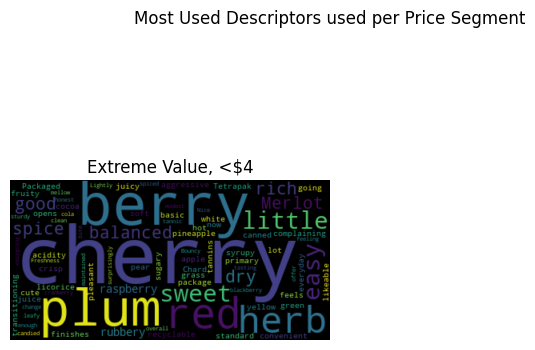

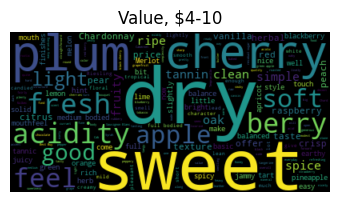

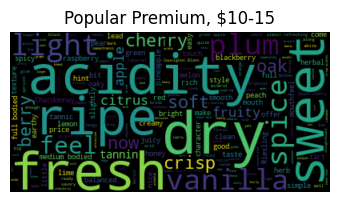

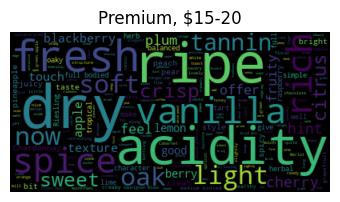

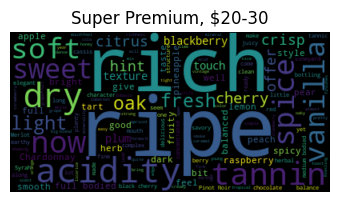

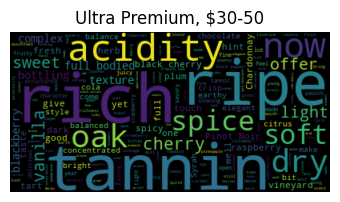

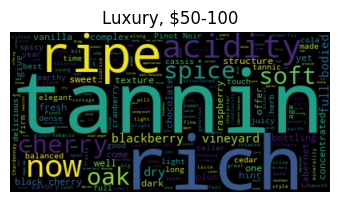

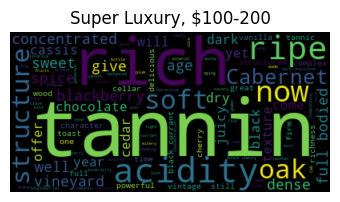

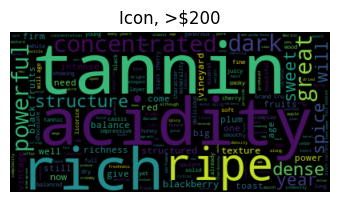

In [26]:

plt.suptitle('Most Used Descriptors used per Price Segment')

# Extreme Value

plt.subplot(121)
plt.axis("off")
#plt.figure( figsize=(10,20))
plt.title('Extreme Value, <$4')
plt.tight_layout(pad=0)
plt.imshow(wordcloud_eval, interpolation='bilinear') # change this value to show different variables 
plt.show()
        

# Value

plt.subplot(121)
plt.axis("off")
#plt.figure( figsize=(10,20))
plt.title('Value, $4-10')
plt.tight_layout(pad=0)
plt.imshow(wordcloud_val, interpolation='bilinear') # change this value to show different variables 
plt.show()

# Popular Premium

plt.subplot(121)
plt.axis("off")
#plt.figure( figsize=(10,20))
plt.title('Popular Premium, $10-15')
plt.tight_layout(pad=0)
plt.imshow(wordcloud_pop, interpolation='bilinear') # change this value to show different variables 
plt.show()

# Premium

plt.subplot(121)
plt.axis("off")
#plt.figure( figsize=(10,20))
plt.title('Premium, $15-20')
plt.tight_layout(pad=0)
plt.imshow(wordcloud_prem, interpolation='bilinear') # change this value to show different variables 
plt.show()

# Super Premium

plt.subplot(121)
plt.axis("off")
#plt.figure( figsize=(10,20))
plt.title('Super Premium, $20-30')
plt.tight_layout(pad=0)
plt.imshow(wordcloud_sup_prem, interpolation='bilinear') # change this value to show different variables 
plt.show()

# Ultra Premium

plt.subplot(121)
plt.axis("off")
#plt.figure( figsize=(10,20))
plt.title('Ultra Premium, $30-50')
plt.tight_layout(pad=0)
plt.imshow(wordcloud_ult_prem, interpolation='bilinear') # change this value to show different variables 
plt.show()

# Luxury

plt.subplot(121)
plt.axis("off")
#plt.figure( figsize=(10,20))
plt.title('Luxury, $50-100')
plt.tight_layout(pad=0)
plt.imshow(wordcloud_lux, interpolation='bilinear') # change this value to show different variables 
plt.show()

# Super Luxury

plt.subplot(121)
plt.axis("off")
#plt.figure( figsize=(10,20))
plt.title('Super Luxury, $100-200')
plt.tight_layout(pad=0)
plt.imshow(wordcloud_sup_lux, interpolation='bilinear') # change this value to show different variables 
plt.show()

# Icon

plt.subplot(121)
plt.axis("off")
#plt.figure( figsize=(10,20))
plt.title('Icon, >$200')
plt.tight_layout(pad=0)
plt.imshow(wordcloud_icon, interpolation='bilinear') # change this value to show different variables 
plt.show()

                      



## Insights

--The descriptors used for the cheapest price range segments (Extreme Value and Value) tended to emphasize berry and fruit flavors (i.e. 'plum' , 'berry', 'cherry', 'plum', 'apple', etc.). In the higher price range segments, especially Luxury to Icon, descriptor words de-emphasize berry flavors and instead emphasize mouth-feel descriptors such as 'acidity' , 'tannin', ' 'structure' , 'rich' , 'ripe'.

-- The descriptor 'tannin' became more prevalent in judge descriptions after the Popular Premium wine segment. Interestingly, 'tannin' appears to become more important as the wine price segment increases from Extreme Value to Ultra Premium-- then appears to increase more gradually from the Ultra Premium to Icon price segments.

-- The descriptors 'ripe' and 'rich' appear significantly more often starting in the Premium price segment, suggesting these terms correspond more closely with higher-priced wines.


## WordClouds of Descriptors in Score Ranges


 -- 1. Group all the wines into their respective score ranges (80-84, 85-89, 90-94, 95-100) using bins
 
 -- 2. For each price group, make a word cloud of the Description column 
      
            

In [16]:
# select the dataframe to show Score and Description columns

desc_score= word_df[['Score', 'Description']]
bins= [80,85,90,95,100]
labels= ['Low 80s', 'High 80s', 'Low 90s', 'High 90s']

# Use .cut() to section the wines into bins based off of Scores, then concatenate all descriptions for each bin
grouped= desc_score.groupby(pd.cut(desc_score['Score'],bins=bins, labels=labels, include_lowest= True))

concatenated= grouped['Description'].apply(lambda x: ''.join(row for row in x.astype(str)))

#make DataFrame of this Series ^
concatenated_df= pd.DataFrame([concatenated])

# reset index of concatenated_df 
concatenated_reset_df = concatenated.reset_index()
concatenated_reset_df

# Check datatype of each row in column 'Description', ensure that it is a string so can be used in WordCloud
type(concatenated_reset_df['Description'][0])
type(concatenated_reset_df['Description'][1])
type(concatenated_reset_df['Description'][2])
type(concatenated_reset_df['Description'][3])






str

In [17]:
stop_words=set(STOPWORDS)
stop_words= ['now','will', 'fruit', 'show', 'shows','note','notes', 'nose', 'finish', 'aroma', 'aromas', 'palate','flavor', 'flavors','drink', 'wine',' wine','wine ', 'Drink'] + list(STOPWORDS)

#index the rows based on scores
low_80s= concatenated_reset_df['Description'][0]
low_80s

high_80s=  concatenated_reset_df['Description'][1]
high_80s

low_90s= concatenated_reset_df['Description'][2]
low_90s

high_90s= concatenated_reset_df['Description'][3]
high_90s


#create variables that correspond to WordCloud object for each score
wc_low80= WordCloud(stopwords=stop_words).generate(low_80s)
wc_low80
wc_high80= WordCloud(stopwords=stop_words).generate(high_80s)
wc_low90= WordCloud(stopwords=stop_words).generate(low_90s)
wc_high90= WordCloud(stopwords=stop_words).generate(high_90s)
wc_high90

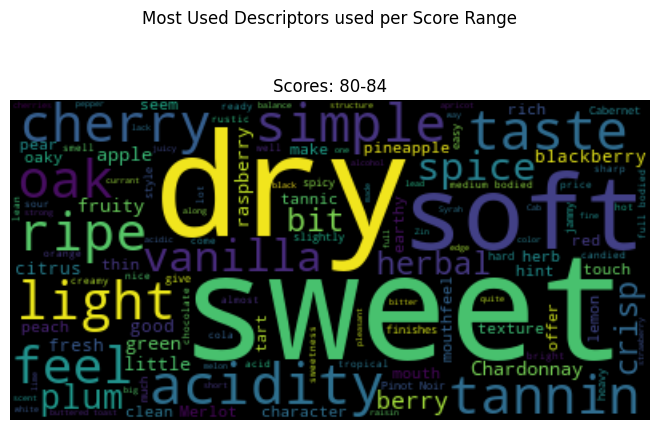

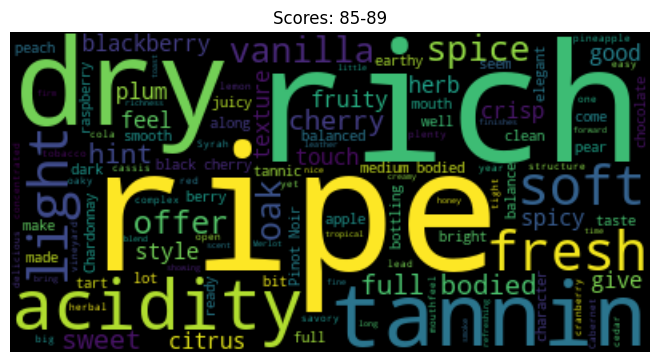

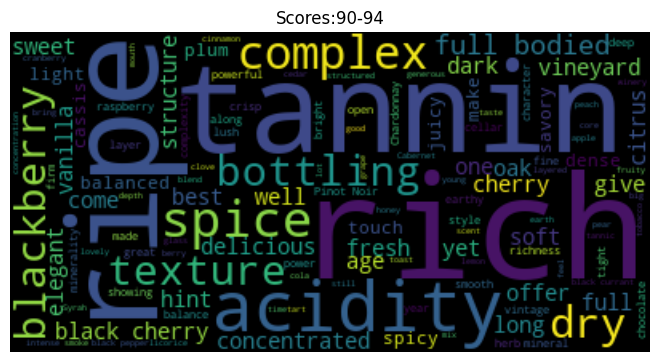

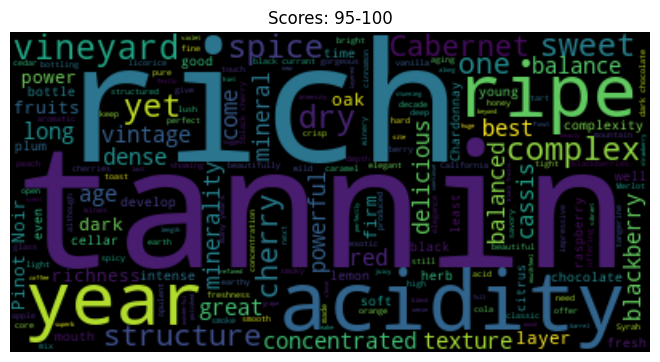

In [21]:
#plot WordCloud objects
plt.suptitle('Most Used Descriptors used per Score Range')


# 80-84

plt.subplot()
plt.axis("off")
plt.title('Scores: 80-84')
plt.tight_layout(pad=0)
plt.imshow(wc_low80, interpolation='bilinear')  
plt.show()

# 85-89

plt.subplot()
plt.axis("off")
plt.title('Scores: 85-89')
plt.tight_layout(pad=0)
plt.imshow(wc_high80, interpolation='bilinear')  
plt.show()

# 90-94

plt.subplot()
plt.axis("off")
plt.title('Scores:90-94')
plt.tight_layout(pad=0)
plt.imshow(wc_low90, interpolation='bilinear') 
plt.show()

# 95-100

plt.subplot()
plt.axis("off")
plt.title('Scores: 95-100')
plt.tight_layout(pad=0)
plt.imshow(wc_high90, interpolation='bilinear')  
plt.show()



## Insights
-- The descriptors used for wines in the highest score range (95-100) emphasize 'tannin', 'rich', 'acidity' and 'ripe' and 'now'. These are descriptors that usually correspond with age and complexity, suggesting that older wines may net better scores. Future research is needed to test this hypothesis.

-- In the lowest score range (80-84), the descriptors 'soft', 'sweet', 'acidity' and 'dry' are dominant. The descriptors in this range also reflect less dimensionality than higher-scored wines. For example, 'cherry', 'spice', 'oak', 'sweet', 'herbal', 'vanilla',etc. are descriptors that most likely were very obvious to judges. In contrast, higher scoring wines show much less emphasis on single-word taste descriptors -- in favor of descriptors that refer to the structure and balance of the wine.

-- In the highest score range (95-100), terms that indicate a higher level of detail and uniqueness such as 'vineyard' and 'vintage' have higher frequencies in wine review descriptions than at lower score ranges. 

-- Balance, structure, and mouthfeel are emphasized in higher-scoring wines (90-100)

-- Emphasis on fruit-forward descriptors and de-emphasis on mouthfeel and structure descriptors in lower scoring wines(80-89)



## Export data to Excel for further cleaning of strings and foreign symbols and Tableau viz

In [19]:

#with pd.ExcelWriter('WineTableauData.xlsx', mode='a') as writer:
   # provinces_df.to_excel(writer, sheet_name='provinces_details')
#with pd.ExcelWriter('WineTableauDataFinal.xlsx', mode='a') as writer:
    #winery_df.to_excel(writer, sheet_name='cabsauv_incl_rank_per_varietal')

